# Deephyper analytics - hyperparameter search study
**path to data file**: /data/a/cpac/aurora/MDN_phoZ/hps_demo/hps_demo/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '/data/a/cpac/aurora/MDN_phoZ/hps_demo/hps_demo/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _101_ **evaluations**.

,activation,lr,units,id,objective,elapsed_sec
0,identity,0.010000,10,76a4cd4c-eb51-11eb-8df3-e974156e0e1f,-0.068587,36.261357
1,identity,0.903031,99,76b17920-eb51-11eb-8df3-e974156e0e1f,-12.196072,27.740281
2,identity,0.528302,5,76b1ce48-eb51-11eb-8df3-e974156e0e1f,-0.116850,31.717662
3,relu,0.834675,20,76b1e734-eb51-11eb-8df3-e974156e0e1f,-0.033331,25.955781
4,relu,0.419180,72,76b21a9c-eb51-11eb-8df3-e974156e0e1f,0.800676,29.159184


## Statistical summary

In [3]:
df.describe()

,lr,units,objective,elapsed_sec
count,101.000000,101.000000,101.000000,101.000000
mean,0.518076,48.594059,-0.176997,37.208365
std,0.299869,30.848072,1.823579,9.655926
min,0.010000,1.000000,-12.542294,23.165434
25%,0.235138,23.000000,-0.165539,28.462956
50%,0.525416,45.000000,-0.052253,36.439042
75%,0.788716,77.000000,0.556061,46.528890
max,0.988677,100.000000,0.978336,54.927696


## Search trajectory

<Figure size 1512x934.487 with 0 Axes>

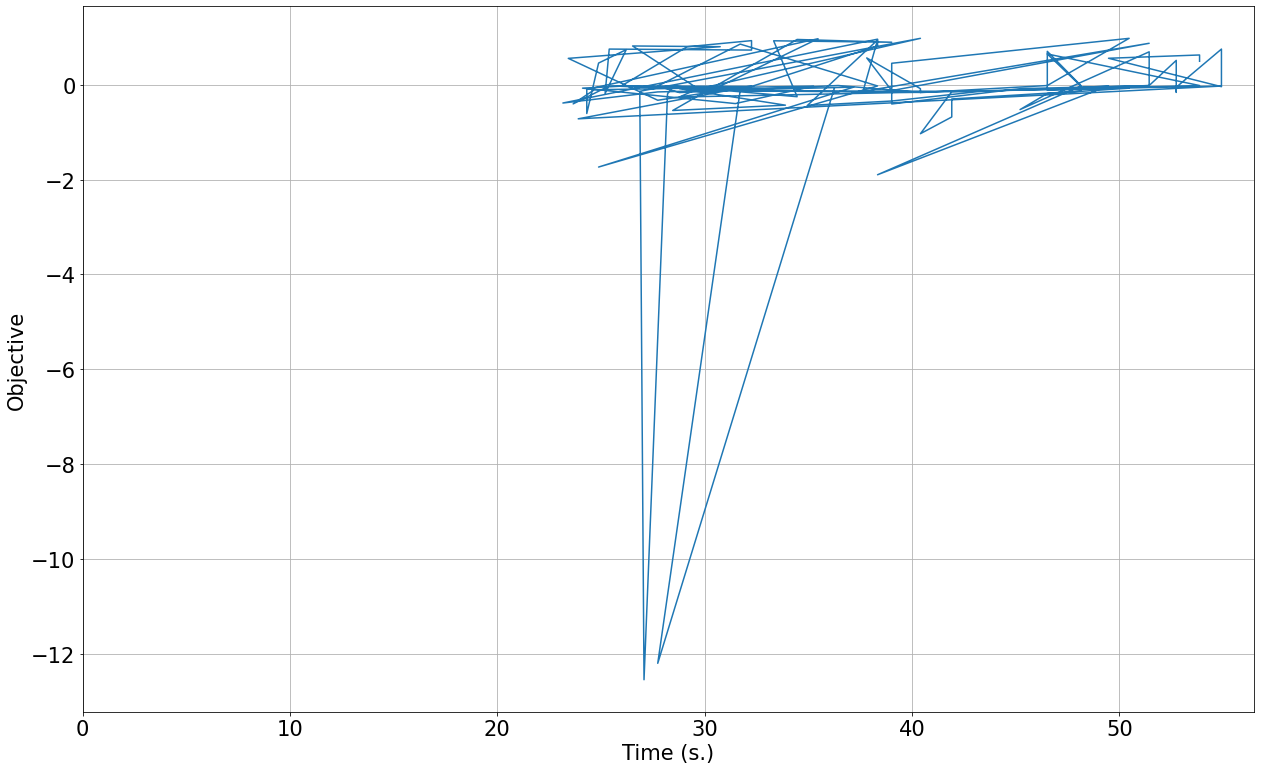

In [9]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(df.elapsed_sec, df.objective)
ax.set_ylabel('Objective')
ax.set_xlabel('Time (s.)')
ax.set_xlim(0)
ax.grid()
fig.savefig("exciting.png")

## Pairplots

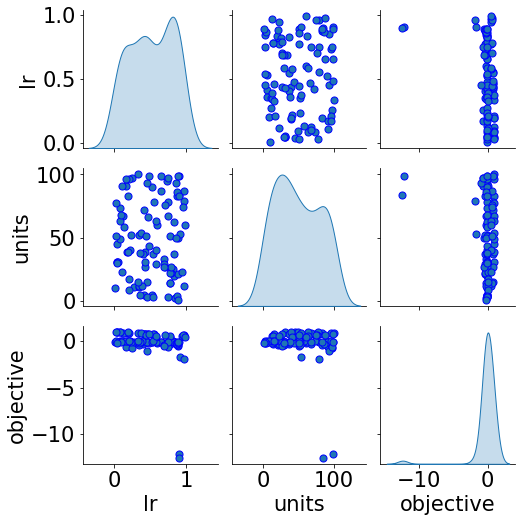

In [5]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

<Figure size 1512x934.487 with 0 Axes>

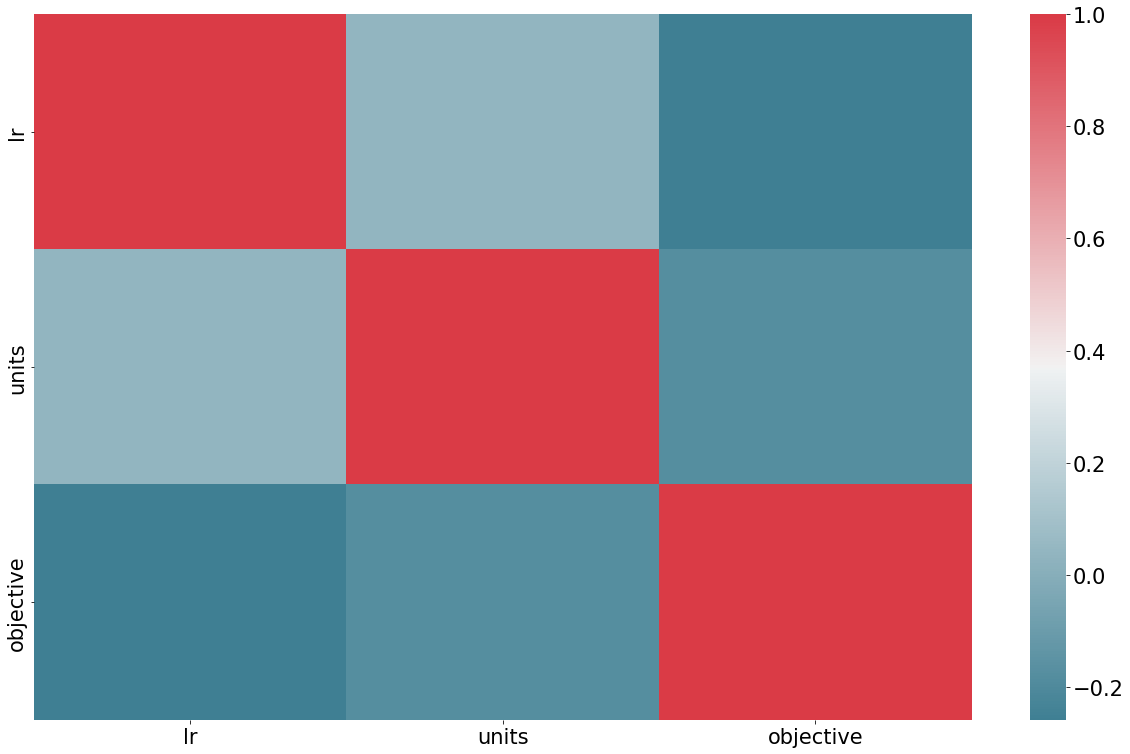

In [6]:
fig = plt.figure()
fig, ax = plt.subplots()
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.set_yticklabels(corr.columns, va='center')
plt.show()

## Best objective

In [7]:
i_max = df.objective.idxmax()
df.iloc[i_max]

activation                                     relu
lr                                         0.033055
units                                            77
id             8190267a-eb51-11eb-8df3-e974156e0e1f
objective                                  0.978336
elapsed_sec                               50.475808
Name: 69, dtype: object

In [8]:
dict(df.iloc[i_max])

{'activation': 'relu',
 'lr': 0.0330547074994065,
 'units': 77,
 'id': '8190267a-eb51-11eb-8df3-e974156e0e1f',
 'objective': 0.9783363938331604,
 'elapsed_sec': 50.47580790519714}

## Follow up

In [13]:
import os
import numpy as np

np.random.seed(2018)

def load_data(dim=10, a=-50, b=50, prop=0.80, size=10000):
    """Generate a random distribution of data for polynome_2 function: -SUM(X**2) where "**" is an element wise operator in the continuous range [a, b].

    Args:
        dim (int): size of input vector for the polynome_2 function.
        a (int): minimum bound for all X dimensions.
        b (int): maximum bound for all X dimensions.
        prop (float): a value between [0., 1.] indicating how to split data between training set and validation set. `prop` corresponds to the ratio of data in training set. `1.-prop` corresponds to the amount of data in validation set.
        size (int): amount of data to generate. It is equal to `len(training_data)+len(validation_data).

    Returns:
        tuple(tuple(ndarray, ndarray), tuple(ndarray, ndarray)): of Numpy arrays: `(train_X, train_y), (valid_X, valid_y)`.
    """

    def polynome_2(x):
        return -sum([x_i**2 for x_i in x])

    d = b - a
    x = np.array([a + np.random.random(dim) * d for i in range(size)])
    y = np.array([[polynome_2(v)] for v in x])

    sep_index = int(prop * size)
    train_X = x[:sep_index]
    train_y = y[:sep_index]

    valid_X = x[sep_index:]
    valid_y = y[sep_index:]

    print(f'train_X shape: {np.shape(train_X)}')
    print(f'train_y shape: {np.shape(train_y)}')
    print(f'valid_X shape: {np.shape(valid_X)}')
    print(f'valid_y shape: {np.shape(valid_y)}')
    return (train_X, train_y), (valid_X, valid_y)

if __name__ == '__main__':
    load_data()

train_X shape: (8000, 10)
train_y shape: (8000, 1)
valid_X shape: (2000, 10)
valid_y shape: (2000, 1)


train_X shape: (8000, 10)
train_y shape: (8000, 1)
valid_X shape: (2000, 10)
valid_y shape: (2000, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                231       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 22        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
125/125 [==============================] - 1s 3ms/step - loss: 12005105.4484 - r2: -1.3516 - val_loss: 3746765.7500 - val_r2: 0.3016
Epoch 2/1000
125/125 [==============================] - 0s 2ms/step - loss: 5211037.3909 - r2: 0.0083 - val_loss: 3507434.7500 - val_r2: 0.3439
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 4141390.0437 - r2: 0.2253 - val_loss: 7201712.5000 -

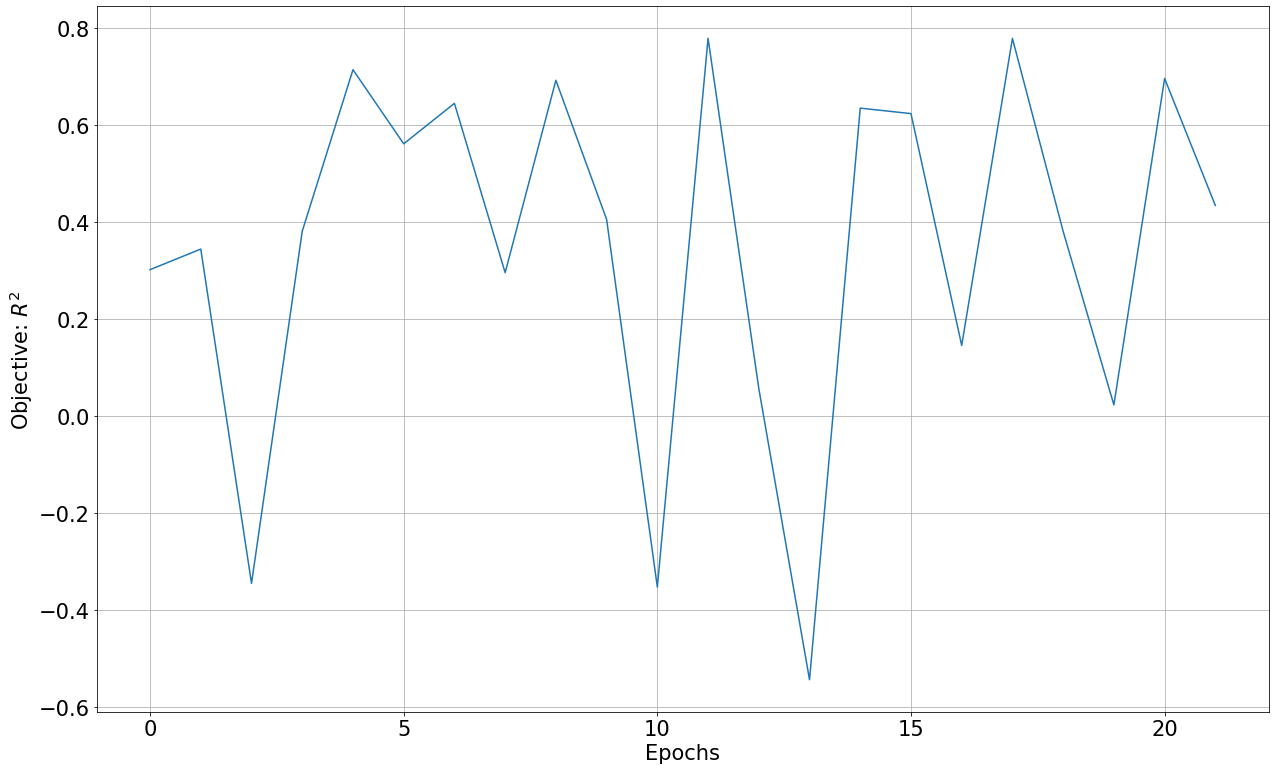

In [17]:

import numpy as np
import keras.backend as K
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

import os
import sys
here = os.path.dirname(os.path.abspath("__file__"))
sys.path.insert(0, here)


def r2(y_true, y_pred):
    SS_res = keras.backend.sum(keras.backend.square(y_true - y_pred), axis=0)
    SS_tot = keras.backend.sum(
        keras.backend.square(y_true - keras.backend.mean(y_true, axis=0)), axis=0
    )
    output_scores = 1 - SS_res / (SS_tot + keras.backend.epsilon())
    r2 = keras.backend.mean(output_scores)
    return r2


HISTORY = None


def run(point):
    global HISTORY
    (x_train, y_train), (x_valid, y_valid) = load_data()

    model = Sequential()
    model.add(Dense(
        point['units'],
        activation=point['activation'],
        input_shape=tuple(np.shape(x_train)[1:])))
    model.add(Dense(1))

    model.summary()

    model.compile(loss='mse', optimizer=RMSprop(lr=point['lr']), metrics=[r2])

    history = model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=1000,
                        verbose=1,
                        callbacks=[EarlyStopping(
                            monitor='val_r2',
                            mode='max',
                            verbose=1,
                            patience=10
                        )],
                        validation_data=(x_valid, y_valid))

    HISTORY = history.history

    return history.history['val_r2'][-1]


if __name__ == '__main__':
    point = {
        'activation': 'relu',
        'lr': 0.8820413612862609,
        'units': 21
    }
    objective = run(point)
    print('objective: ', objective)
    import matplotlib.pyplot as plt
    plt.plot(HISTORY['val_r2'])
    plt.xlabel('Epochs')
    plt.ylabel('Objective: $R^2$')
    plt.grid()
    plt.show()